<a href="https://colab.research.google.com/github/duchaba/python_simplified_with_genai/blob/master/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌻 Welcome Reader and Coder
---

- Let's Rock and Roll

In [1]:
# prompt: print date time

import datetime
print(f'Hello world time: {datetime.datetime.now()}')


Hello world time: 2025-03-06 07:27:21.044984


## 🍀 Author: Duc
---


# 🤖 Topic: Understand The Dynamic Trio

In [ ]:
# if your system does not have graphvix
!pip install graphviz

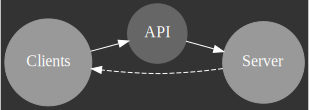

In [2]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(format='png')
dot.attr(bgcolor="gray20")
dot.attr(fontcolor="white")

# Set graph to horizontal layout
dot.attr(rankdir='LR')

# Add nodes
dot.node('a', 'Clients', shape='circle', style='filled', color='gray60', fontsize='16', fontcolor="white")
dot.node('b', 'API', shape='circle', style='filled', color='gray40', fontsize='16', fontcolor="white")
dot.node('c', 'Server', shape='circle', style='filled', color='gray60', fontsize='16', fontcolor="white")

# Add edges
dot.edge('a', 'b', color='white')
dot.edge('b', 'c', color='white')
dot.edge('c', 'a', color='white', style="dashed",)

# Render the graph
display(dot)


# 🤖 Topic: Deployment

## Smoke test: quick sample

In [3]:
# prompt: install and import gradio and print gradio version

!pip install gradio
import gradio

# print version
print(f'Installed Graido version: {gradio.__version__}. As of November 2024, we are using Gradio version: 5.14.0.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Installed Graido version: 5.20.0. As of November 2024, we are using Gradio version: 5.14.0.


In [4]:
# prompt: print gradio version

print(f'Installed Graido version: {gradio.__version__}. I am using Gradio version: 4.38.1.')

Installed Graido version: 5.20.0. I am using Gradio version: 4.38.1.


In [7]:
# %%writefile app.py

def calculator(num1, num2, operation):
  if operation == "add":
    return num1 + num2
  elif operation == "subtract":
    return num1 - num2
  elif operation == "multiply":
    return num1 * num2
  elif operation == "divide":
    if num2 == 0:
      return "Division by zero!"
    return num1 / num2

In [8]:
# %%writefile -a app.py

# prompt: using gradio to create two numbers input side by side. below it have 4 buttons for add, subtract, multiply, and dive, add title Calculator

import gradio as gr

with gr.Blocks() as calculator_app:
    gr.Markdown("## Calculator")
    with gr.Row():
        num1 = gr.Number(label="Number 1")
        num2 = gr.Number(label="Number 2")
    with gr.Row():
        add_btn = gr.Button("Add")
        subtract_btn = gr.Button("Subtract")
        multiply_btn = gr.Button("Multiply")
        divide_btn = gr.Button("Divide")
    output = gr.Textbox(label="Output")

    add_btn.click(calculator, inputs=[num1, num2, gr.Textbox(value="add", visible=False)], outputs=output)
    subtract_btn.click(calculator, inputs=[num1, num2, gr.Textbox(value="subtract", visible=False)], outputs=output)
    multiply_btn.click(calculator, inputs=[num1, num2, gr.Textbox(value="multiply", visible=False)], outputs=output)
    divide_btn.click(calculator, inputs=[num1, num2, gr.Textbox(value="divide", visible=False)], outputs=output)

calculator_app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b5e353dd52932f75f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [9]:
!pip install gradio_client

# STOP

- Copy the public URL from above code cell.
  - Example: public URL: https://4b5e353dd52932f75f.gradio.live

In [10]:
# prompt: copy from gradio API for Calculator app

from gradio_client import Client

client = Client("https://4b5e353dd52932f75f.gradio.live/") # STOP: copy the above public URL here
result = client.predict(
		num1=13,
		num2=21,
		operation="add",
		api_name="/calculator"
)
print(f"The response from our Calculator app: {result}")

Loaded as API: https://4b5e353dd52932f75f.gradio.live/ ✔
The response from our Calculator app: 34


In [11]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [12]:

# Example usage
my_list = [5, 1, 9, 3, 7, 4, 6, 2, 8]
sorted_list = quick_sort(my_list)
print(f"Original list: {my_list}")
print(f"Sorted list: {sorted_list}")


Original list: [5, 1, 9, 3, 7, 4, 6, 2, 8]
Sorted list: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
# prompt: Write a Gradio interface for the quick short where the input is an unorder list and the ouput is an ordered list. Including the title and description.

import gradio as gr

def sort_list(input_data):
    if isinstance(input_data, list):
        return quick_sort(input_data)
    elif isinstance(input_data, str):
        try:
            input_list = [int(x.strip()) for x in input_data.split(',')]
            return quick_sort(input_list)
        except ValueError:
            words_list = [x.strip() for x in input_data.split(',')]
            return sorted(words_list)
    else:
        return "Invalid input type. Please provide a list of integers or a comma-separated string of numbers or words."

sort_app = gr.Interface(
    fn=sort_list,
    inputs=gr.Textbox(placeholder="Enter numbers or words separated by commas, like: 9,3,8,1"),
    outputs=gr.Textbox(),
    title="Quick Sort Algorithm",
    description="Enter a list of numbers or words, comma-speparated and get the sorted result.",
)
sort_app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://566832c229428c2203.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [14]:
# prompt: generate 40 random word print out with comma seperate each word (no quote output)

import random

def generate_random_words(num_words):
    # Sample list of words (you can replace this with a larger word list)
    words = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape", "honeydew", "kiwi", "lemon", "mango", "nectarine", "orange", "papaya", "quince", "raspberry", "strawberry", "tangerine", "ugli", "watermelon", "apricot", "avocado", "blueberry", "cranberry", "grapefruit", "lime", "melon", "plum", "pineapple", "pomegranate", "blackberry", "coconut", "guava", "jackfruit", "lychee", "mandarin", "mulberry", "passionfruit", "persimmon", "starfruit"]

    random_words = random.sample(words, min(num_words, len(words)))  # Ensure we don't try to sample more words than exist
    return random_words


# Generate 40 random words
random_word_list = generate_random_words(40)

# Print the words separated by commas (without quotes)
print(",".join(random_word_list))


melon,elderberry,jackfruit,watermelon,starfruit,passionfruit,strawberry,date,pomegranate,raspberry,avocado,kiwi,tangerine,guava,cranberry,coconut,lemon,banana,nectarine,apple,grape,apricot,quince,grapefruit,plum,honeydew,mango,ugli,orange,mulberry,lychee,persimmon,papaya,blackberry,pineapple,cherry,lime,fig,blueberry,mandarin


# STOP:

- You must copy and upload the learner_snake.pkl from Chapter 6 to here before running the next code cell.

In [16]:
# prompt: Create interface for the Snake CNN Clasification using the export fast.ai learner_snake, and the input is a picture and the output is prediction of poisonous or safe.

import gradio as gr
from fastai.vision.all import load_learner, PILImage

# Load the trained model
learner = load_learner('learner_snake.pkl') #STOP: you must copy and upload the learner_snake.pkl first

def classify_snake(image):
    pred, _, probs = learner.predict(PILImage.create(image))
    return f"Prediction: {pred}, Confidence: {probs.max():.4f}"

cnn_snake_app = gr.Interface(
    fn=classify_snake,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(),
    title="Snake Poisonous Classifier",
    description="Upload an image of a snake, and the model will predict if it is poisonous or safe.",
)

cnn_snake_app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a3a42637a8e8164dd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [17]:
# prompt: design a gradio theme using theme builder
import gradio

In [18]:
# prompt: design a gradio theme using theme builder

gradio.themes.builder()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://310e013be143cd891e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


 - Creat the HuggingFace space

 - See the result